In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dpath = 'billionaires.csv'

In [3]:
df = pd.read_csv(dpath)
df.head()

,Rank,Name,Net Worth,Num Worth,Age,Gender,Source,Country of Citizenship,What I Learned
0,#266,Philip & Cristina Green,$5.6 B,$5.60,64,Couple,fashion retail,United Kingdom,NaN
1,#814,Vinod & Anil Rai Gupta,$2.5 B,$2.50,71,Couple,electrical equipment,India,NaN
2,#328,Tom & Judy Love,$5 B,$5,78,Couple,retail & gas stations,United States,NaN
3,#543,Dominika & Sebastian Kulczyk,$3.4 B,$3.40,-,Couple,diversified,Poland,NaN
4,#132,Gianluigi & Rafaela Aponte,$9.5 B,$9.50,-,Couple,shipping,Switzerland,NaN


In [4]:
df.columns = ['_'.join([x.lower() for x in c.split()]) for c in df.columns]

In [5]:
df.describe()

,rank,name,net_worth,num_worth,age,gender,source,country_of_citizenship,what_i_learned
count,1860,1860,1860,1860,1860,1860,1860,1860,7
unique,1750,1858,169,169,75,3,723,67,7
top,#924,Jim Davis,$1.1 B,$1.10,65,Male,real estate,United States,Snapchat Humanizes Technology into more natura...
freq,8,2,115,115,57,1670,130,536,1


In [6]:
df = df.drop(columns=['net_worth', 'what_i_learned'], axis=1)

In [7]:
df['sort'] = df['rank'].apply(lambda x: int(x[1:]))
df = df.sort_values(['sort']).reset_index(drop=True).drop(columns=['sort'], axis=1)

In [8]:
df.head()

,rank,name,num_worth,age,gender,source,country_of_citizenship
0,#1,Bill Gates,$79.10,60,Male,Microsoft,United States
1,#2,Amancio Ortega,$76.90,80,Male,Zara,Spain
2,#3,Jeff Bezos,$65.80,52,Male,Amazon.com,United States
3,#4,Warren Buffett,$65.50,86,Male,Berkshire Hathaway,United States
4,#5,Mark Zuckerberg,$55,32,Male,Facebook,United States


In [9]:
df.describe()

,rank,name,num_worth,age,gender,source,country_of_citizenship
count,1860,1860,1860,1860,1860,1860,1860
unique,1750,1858,169,75,3,723,67
top,#924,Jim Davis,$1.10,65,Male,real estate,United States
freq,8,2,115,57,1670,130,536


In [10]:
df.head()

,rank,name,num_worth,age,gender,source,country_of_citizenship
0,#1,Bill Gates,$79.10,60,Male,Microsoft,United States
1,#2,Amancio Ortega,$76.90,80,Male,Zara,Spain
2,#3,Jeff Bezos,$65.80,52,Male,Amazon.com,United States
3,#4,Warren Buffett,$65.50,86,Male,Berkshire Hathaway,United States
4,#5,Mark Zuckerberg,$55,32,Male,Facebook,United States


In [11]:
worth = df['num_worth'].apply(lambda x: float(x[1:])).tolist()

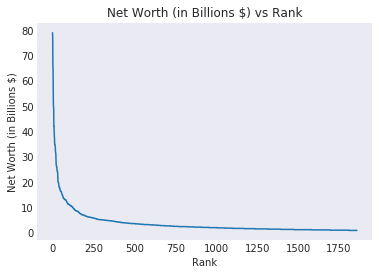

In [12]:
sns.set_style('darkgrid', {'axes.grid' : False})
plt.plot(np.arange(len(worth)), worth)
plt.xlabel('Rank')
plt.ylabel('Net Worth (in Billions $)')
plt.title('Net Worth (in Billions $) vs Rank')
plt.savefig('Net_Worth_(in_Billions_$)_vs_Rank.jpg')

In [13]:
mean_worth = np.mean(worth)
mean_worth

3.868279569892473

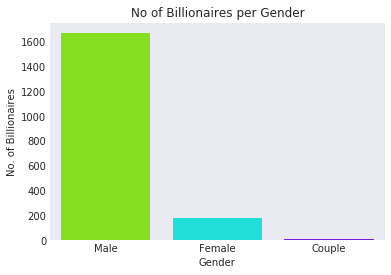

In [14]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='gender', data=df, palette='hsv')
ax.set_xlabel('Gender')
ax.set_ylabel('No. of Billionaires')
ax.set_title('No of Billionaires per Gender')
plt.savefig('No_of_Billionaires_per_Gender.jpg')
plt.show()

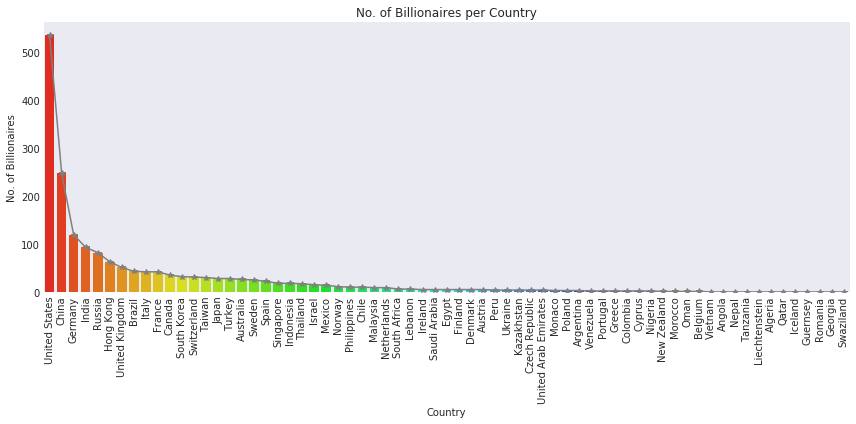

In [15]:
plt.figure(figsize=(12, 6))
country_counts = df['country_of_citizenship'].value_counts()
ax = sns.countplot(x='country_of_citizenship', 
                   data=df, 
                   palette='hsv', order=country_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('No. of Billionaires')
ax.set_title('No. of Billionaires per Country')
plt.plot(np.arange(len(country_counts)), country_counts, c='gray', marker='*')
plt.tight_layout()
plt.savefig('No._of_Billionaires_per_Country.jpg')
plt.show()

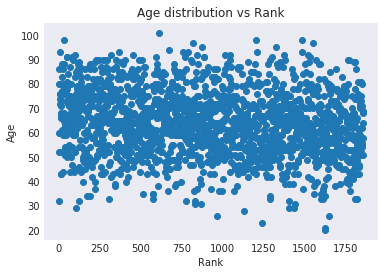

In [16]:
ages_by_worth = df['age'].apply(lambda x: np.float32(x) if x != '-' else np.nan)
plt.title('Age distribution vs Rank')
plt.xlabel('Rank')
plt.ylabel('Age')
plt.scatter(np.arange(len(ages_by_worth)), ages_by_worth)
plt.savefig('Age_distribution_vs_Rank.jpg')

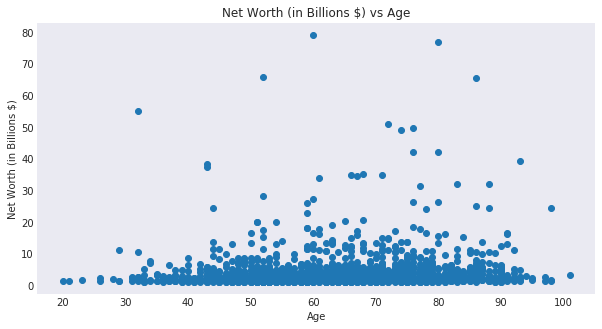

In [17]:
plt.figure(figsize=(10, 5))
plt.xlabel('Age')
plt.ylabel('Net Worth (in Billions $)')
plt.title('Net Worth (in Billions $) vs Age')
plt.scatter(ages_by_worth, worth)
plt.savefig('Net_Worth_(in_Billions_$)_vs_Age.jpg')

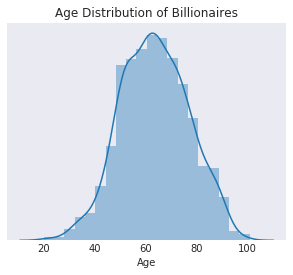

In [18]:
plt.figure(figsize=(5, 4))
ax = sns.distplot(ages_by_worth[~ages_by_worth.isnull()], bins=20)
ax.set_xlabel('Age')
ax.set_yticks([])
ax.set_title('Age Distribution of Billionaires')
plt.savefig('Age_Distribution_of_Billionaires.jpg')
plt.show()


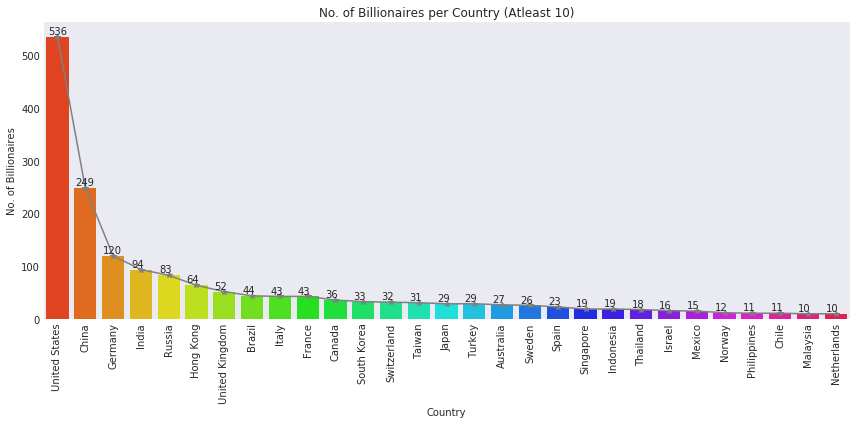

In [19]:
atleast10countries_count = country_counts[country_counts >= 10]
atleast10countries = atleast10countries_count.index
atleast10df = df[df['country_of_citizenship'].apply(lambda x: x in atleast10countries)]
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='country_of_citizenship', 
                   data=atleast10df, 
                   palette='hsv', order=atleast10countries_count.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('No. of Billionaires')
ax.set_title('No. of Billionaires per Country (Atleast 10)')
for i, p in enumerate(ax.patches):
    ax.annotate('{0}'.format(atleast10countries_count[i]), (p.get_x()+0.05, p.get_height()+5))
plt.plot(np.arange(len(atleast10countries_count)), atleast10countries_count, c='gray', marker='*')
plt.tight_layout()
plt.savefig('No._of_Billionaires_per_Country_(Atleast_10).jpg')
plt.show()

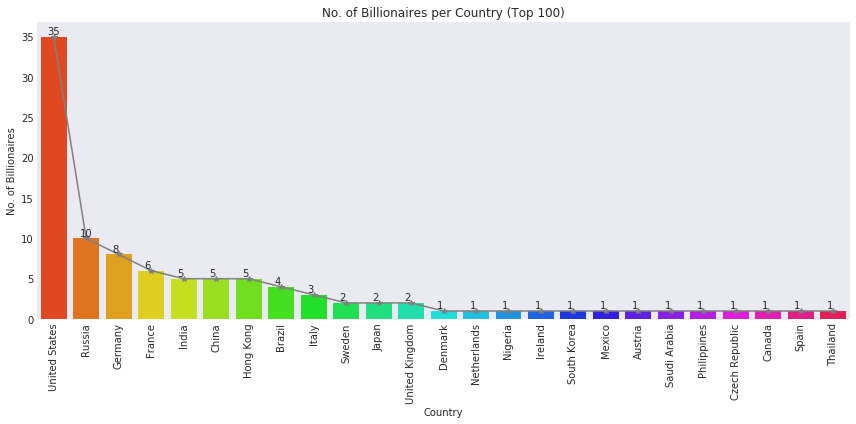

In [20]:
top100 = df.iloc[:100]
plt.figure(figsize=(12, 6))
top100_country_counts = top100['country_of_citizenship'].value_counts()
ax = sns.countplot(x='country_of_citizenship', 
                   data=top100, 
                   palette='hsv', order=top100_country_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('No. of Billionaires')
ax.set_title('No. of Billionaires per Country (Top 100)')
for i, p in enumerate(ax.patches):
    ax.annotate('{0}'.format(top100_country_counts[i]), (p.get_x()+0.2, p.get_height()+0.3))
plt.plot(np.arange(len(top100_country_counts)), top100_country_counts, c='gray', marker='*')
plt.tight_layout()
plt.savefig('No._of_Billionaires_per_Country_(Top_100).jpg')
plt.show()

In [28]:
df[df['country_of_citizenship'] == 'India'][:5]

,rank,name,num_worth,age,gender,source,country_of_citizenship
32,#33,Mukesh Ambani,$22.80,59,Male,"petrochemicals, oil & gas",India
49,#50,Dilip Shanghvi,$16.60,60,Male,pharmaceuticals,India
60,#61,Azim Premji,$14.90,71,Male,software services,India
89,#90,Lakshmi Mittal,$11.90,66,Male,steel,India
95,#96,Shiv Nadar,$11.40,71,Male,software services,India
